### Naive Bayes Classifiers

A family of algorithms based on Bayes' Theorem is known as the Naive Bayes classifiers. Because of their ease of use and effectiveness in machine learning, these classifiers are frequently used, despite the "naive" assumption of feature independence. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other. 

Naïve Bayes algorithm is used for classification problems. It is highly used in text classification. In text classification tasks, data contains high dimension (as each word represent one feature in the data). It is used in spam filtering, sentiment detection, rating classification etc. The advantage of using naïve Bayes is its speed. It is fast and making prediction is easy with high dimension of data.

This model predicts the probability of an instance belongs to a class with a given set of feature value. It is a probabilistic classifier. It is because it assumes that one feature in the model is independent of existence of another feature. In other words, each feature contributes to the predictions with no relation between each other. In real world, this condition satisfies rarely.

To start with, let us consider a dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will be using a simple dataset on diabetes. It contains two features: ``glucose`` and ``bloodpressure``. The ``diabetes`` column is ``0`` for no diabetes and ``1`` for diabetes. Let's import the dataset and see what type of data we have in hand.

In [2]:
df = pd.read_csv("datasets/diabetes.csv")
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [4]:
df.dtypes

glucose          int64
bloodpressure    int64
diabetes         int64
dtype: object

Okay, the data looks good, we don't have missing values and the class is already categorically represented as numbers, so we may not have to do much pre-processing. But before moving further, let's explore some assumptions about Naive Bayes

### Assumption of Naive Bayes

The fundamental Naive Bayes assumption is that each feature makes an:

- **Feature independence**: The features of the data are conditionally independent of each other, given the class label.
- **Continuous features are normally distributed**: If a feature is continuous, then it is assumed to be normally distributed within each class.
- **Discrete features have multinomial distributions**: If a feature is discrete, then it is assumed to have a multinomial distribution within each class.
- **Features are equally important**: All features are assumed to contribute equally to the prediction of the class label.
- **No missing data**: The data should not contain any missing values.

From this we can see that we dont have missing data, and our features are considered equally important already. Let's check if ours features are independant of eachother and if they are normally distrubuted

One way to check for relations is to use a Correlation Matrix. A correlation matrix is a table that summarizes the relationship between multiple variables in a dataset. It shows the correlation coefficients between each pair of variables, which indicate the strength and direction of the relationship between the variables. It is useful for identifying highly correlated variables and selecting a subset of variables for further analysis.

The correlation coefficient can range from ``-1`` to ``1``, where:

- A correlation coefficient of ``-1`` indicates a **strong negative relationship** between two variables
- A correlation coefficient of ``0`` indicates **no relationship** between two variables
- A correlation coefficient of ``1`` indicates a **strong positive relationshi**p between two variables

We will make a heatmap to make it easier for us to understand the correlation matrix

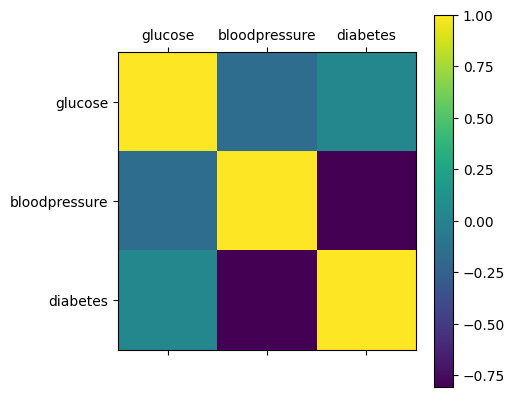

In [10]:
plt.matshow(df.corr()) # df.corr() gives us the correlation matrix for the dataset and matshow() is used to plot the matrix in a heatmap
plt.xticks(range(len(df.columns)), df.columns) # this will show the names of the columns on the x-axis
plt.yticks(range(len(df.columns)), df.columns) # this will show the names of the columns on the y-axis
plt.colorbar() # adds a colorbar to the heatmap
plt.show()

Okay that looks cool but how to read the heatmap? Okay first thing, we know that diabetes is our dependant variable (AKA not a feature) so we will ignore the row and column for diabetes. Let's plot just that to make it easier

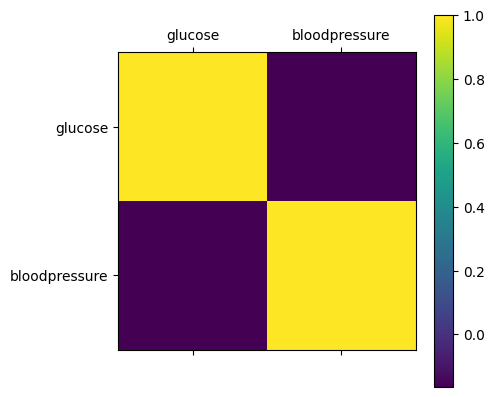

In [12]:
df_features = df.drop("diabetes", axis=1) # drop the diabetes column

plt.matshow(df_features.corr()) # df.corr() gives us the correlation matrix for the dataset and matshow() is used to plot the matrix in a heatmap
plt.xticks(range(len(df_features.columns)), df_features.columns) # this will show the names of the columns on the x-axis
plt.yticks(range(len(df_features.columns)), df_features.columns) # this will show the names of the columns on the y-axis
plt.colorbar() # adds a colorbar to the heatmap
plt.show()

Nice! let's focus on this heatmap now. The yellow color indicates a correlation of 1, i.e, Maximum positive correlation, but that is only because the feature is being compared to itself, so we will ignore that too. That leaves us with just the purple boxes. From the colorbar, we can see that the purple color corresponds to about 0 correlation. This means that bloodpressure and glucose are independant of each other. Hence the assumption is valid for Naive Bayes.

Finally, let us check if our features have some kind of normal distribution, we will use the histogram function of matplotlib for this. If you don't remember this, check out week 2 data visualization.

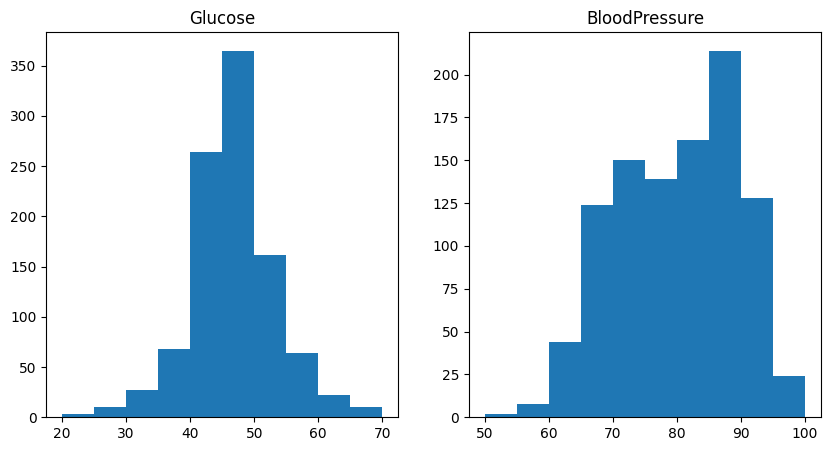

In [5]:
# make subplots for each feature
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(df["glucose"])
axs[0].set_title("Glucose")
axs[1].hist(df["bloodpressure"])
axs[1].set_title("BloodPressure")

plt.show()

Great! the data seems to have an approximate normal distribution. We can move to the next step now, i.e, Modelling. But before that we will split the data into training and testing data with the help of ``sklearn``'s ``train_test_split`` function. We will also import ``GaussianNB`` model from ``sklearn``'s ``naive_bayes`` set of models. We will use this as the data is approximately Normally distributed. The ``naive_bayes`` set also has some other models:

- ``MultinomialNB``
- ``ComplementNB``
- ``BernoulliNB``
- ``CategoricalNB``

To learn more about these models check it out [here](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X = df.drop("diabetes", axis=1)
y = df["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now let us fit our data to the model

In [7]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Cool, training is done, we need to evaluate the model now. Let's look at accuracy on the test data

In [8]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print(f"Accuracy of the model is: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy of the model is: 0.9346733668341709
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        99
           1       0.94      0.93      0.93       100

    accuracy                           0.93       199
   macro avg       0.93      0.93      0.93       199
weighted avg       0.93      0.93      0.93       199



That is a good score. Try out the other naive_bayes models and see what the results are. For the math behind Naive Bayes check this [link](https://www.geeksforgeeks.org/naive-bayes-classifiers/) out.